In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [104]:
customer_df = pd.read_csv('marketing_campaign.csv', sep='\t')

### Exploration and cleaning of data

#### Exploration

In [105]:
customer_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [106]:
customer_df.shape

(2240, 29)

In [107]:
customer_df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [108]:
customer_df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [109]:
customer_df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [110]:
for col_no_numeric in ['Education', 'Marital_Status']:
    print('-------------------------------------------------')
    print(customer_df[col_no_numeric].value_counts())

-------------------------------------------------
Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64
-------------------------------------------------
Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


In [111]:
# Verifying Number of children, Number of teenagers and Customer acceptance the offer
numeric_columns = ['Kidhome','Teenhome','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','Complain',
                'Response']
for col_numeric in numeric_columns:
    print('-------------------------------------')
    print(customer_df[col_numeric].value_counts())

-------------------------------------
Kidhome
0    1293
1     899
2      48
Name: count, dtype: int64
-------------------------------------
Teenhome
0    1158
1    1030
2      52
Name: count, dtype: int64
-------------------------------------
AcceptedCmp3
0    2077
1     163
Name: count, dtype: int64
-------------------------------------
AcceptedCmp4
0    2073
1     167
Name: count, dtype: int64
-------------------------------------
AcceptedCmp5
0    2077
1     163
Name: count, dtype: int64
-------------------------------------
AcceptedCmp1
0    2096
1     144
Name: count, dtype: int64
-------------------------------------
AcceptedCmp2
0    2210
1      30
Name: count, dtype: int64
-------------------------------------
Complain
0    2219
1      21
Name: count, dtype: int64
-------------------------------------
Response
0    1906
1     334
Name: count, dtype: int64


In [112]:
customer_df[['Year_Birth','Income','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts',
            'MntGoldProds']].describe()

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52247.251354,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875
std,11.984069,25173.076661,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35303.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000
50%,1970.000000,51381.500000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000
75%,1977.000000,68522.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000
max,1996.000000,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000


In [113]:
customer_df[['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','Z_CostContact',
            'Z_Revenue']].describe()

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0
mean,2.325000,4.084821,2.662054,5.790179,5.316518,3.0,11.0
std,1.932238,2.778714,2.923101,3.250958,2.426645,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0
25%,1.000000,2.000000,0.000000,3.000000,3.000000,3.0,11.0
50%,2.000000,4.000000,2.000000,5.000000,6.000000,3.0,11.0
75%,3.000000,6.000000,4.000000,8.000000,7.000000,3.0,11.0
max,15.000000,27.000000,28.000000,13.000000,20.000000,3.0,11.0


In [114]:
duplicates = customer_df.duplicated(subset='ID', keep=False)
customer_df[duplicates]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


#### Cleaning and transformation of data

In [115]:
# Convert the column to datetime
customer_df['Dt_Customer'] = pd.to_datetime(customer_df['Dt_Customer'], format= '%d-%m-%Y')

# Review with assert
assert pd.api.types.is_datetime64_any_dtype(customer_df['Dt_Customer']), "The column is not a datetime"

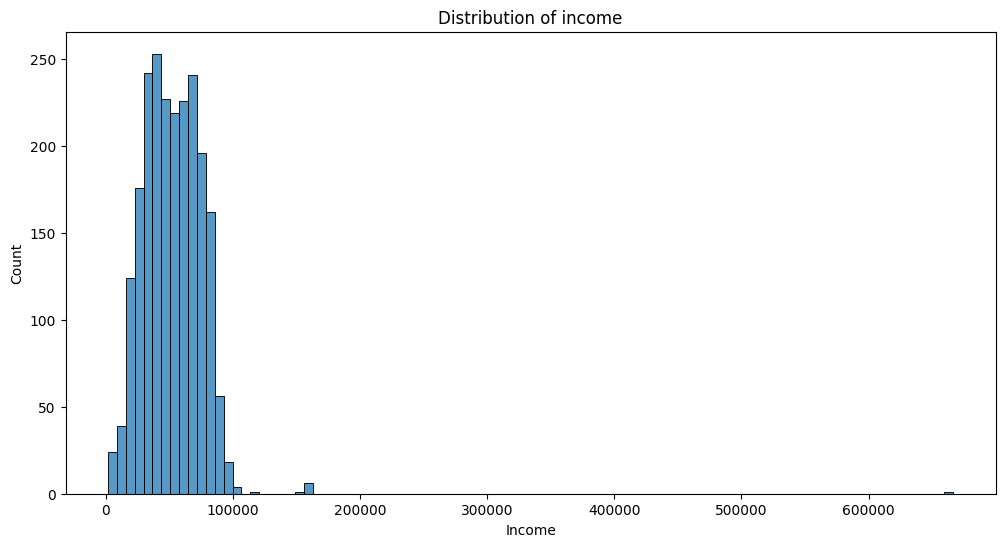

In [116]:
plt.figure(figsize=(12,6))
sns.histplot(data = customer_df, x='Income')
plt.title('Distribution of income')
plt.show()

In [117]:
# Null values in Income column = 24
# Threshold of 5% over all dataframe
threshold = len(customer_df) * 0.05
print(f"Threshold of 5%: {threshold}")

Threshold of 5%: 112.0


In [118]:
# Verifying null values on income column
null_values = customer_df['Income'].isna()
income_null_values =customer_df[null_values]
income_null_values

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,...,6,0,0,0,0,0,0,3,11,0


In [119]:
# Groupping Education by Income
income_dict = customer_df.groupby('Education')['Income'].median().to_dict()

# Filling null values income by median of education
customer_df['Income'] = customer_df['Income'].fillna(customer_df['Education'].map(income_dict))

### Analysis

In [120]:
# Defining customer personalities
# Creating Age column of customers
customer_df['Age'] = datetime.now().year - customer_df['Year_Birth']

# Creating spending column based on products columns
customer_df['Spending'] = customer_df['MntWines'] + customer_df['MntFruits'] + customer_df['MntMeatProducts'] \
+ customer_df['MntFishProducts'] + customer_df['MntSweetProducts'] + customer_df['MntGoldProds']

# Creating customer seniority column
last_date = pd.to_datetime("today")
customer_df['Customer_seniority_months'] = (last_date - customer_df['Dt_Customer']).dt.days//30
customer_df[['Customer_seniority_months']]

# Creating variables about children and teenagers
customer_df['Children'] = customer_df['Kidhome'] + customer_df['Teenhome']
customer_df['Has_child'] = np.where(customer_df.Children > 0, 'Has child', 'No child')
customer_df['Children'] = customer_df['Children'].replace({3:'3 children',2:'2 children',1:'1 child', 0:'No child'})

In [121]:
# Grouping Marital status column into two categories
customer_df['Marital_Status'] = customer_df['Marital_Status'].replace({
    'Divorced':'Alone',
    'Single':'Alone',
    'Married':'In couple',
    'Together':'In couple',
    'Absurd':'Alone',
    'Widow':'Alone',
    'YOLO':'Alone'})

# Grouping Education column into two categories
customer_df['Education'] = customer_df['Education'].replace({
    'Basic':'Undergraduate',
    '2n Cycle':'Undergraduate',
    'Graduation':'Postgraduate',
    'Master':'Postgraduate', 
    'PhD':'Postgraduate'})

In [122]:
# Rename purchase columns
customer_df = customer_df.rename(columns={
    'NumWebPurchases':'Web', 
    'NumCatalogPurchases':'Catalog',
    'NumStorePurchases':'Store'})

# Rename products columns
customer_df = customer_df.rename(columns={
    'MntWines':'Wines',
    'MntFruits':'Fruits',
    'MntMeatProducts': 'Meat', 
    'MntFishProducts':'Fish',
    'MntSweetProducts':'Sweet',
    'MntGoldProds':'Gold'})

In [123]:
customer_df = customer_df[['Age','Education','Marital_Status','Income','Spending','Customer_seniority_months','Has_child',
                        'Children','Wines','Fruits','Meat','Fish','Sweet','Gold']]
customer_df.head()

,Age,Education,Marital_Status,Income,Spending,Customer_seniority_months,Has_child,Children,Wines,Fruits,Meat,Fish,Sweet,Gold
0,68,Postgraduate,Alone,58138.0,1617,159,No child,No child,635,88,546,172,88,88
1,71,Postgraduate,Alone,46344.0,27,141,Has child,2 children,11,1,6,2,1,6
2,60,Postgraduate,In couple,71613.0,776,147,No child,No child,426,49,127,111,21,42
3,41,Postgraduate,In couple,26646.0,53,141,Has child,1 child,11,4,20,10,3,5
4,44,Postgraduate,In couple,58293.0,422,142,Has child,1 child,173,43,118,46,27,15


In [124]:
# Preparation for Customer Personality Analysis
# Income segmentation column
customer_df.loc[:,'Income_segment'] = pd.qcut(customer_df['Income'], q=3, labels=['Low','Medium','High'])

# Age group column
customer_df['Age_group'] = pd.cut(customer_df['Age'], bins=[0,30,50,100], labels=['Young','Adult','Senior'])

# Spending level column
customer_df['Spending_level'] = pd.qcut(customer_df['Spending'],q=3,labels=['Low','Medium','High'])

# Seniority level column
customer_df['Seniority_level'] = pd.qcut(customer_df['Customer_seniority_months'],q=3,labels=['New','Medium','Old'])

# Groupinf by consumption level on Wines, Fruits, Meat, Fish, Sweet and Gold
for col_consumption in ['Wines','Fruits','Fish','Sweet','Gold']:
    customer_df[col_consumption + '_level'] = pd.qcut(customer_df[col_consumption],q=3,labels=['Low','Medium','High'])

In [125]:
# Drop columns
customer_df = customer_df.drop(columns=['Age','Spending','Income','Customer_seniority_months','Wines','Fruits','Meat','Fish','Sweet','Gold'])

In [126]:
customer_df.head()

,Education,Marital_Status,Has_child,Children,Income_segment,Age_group,Spending_level,Seniority_level,Wines_level,Fruits_level,Fish_level,Sweet_level,Gold_level
0,Postgraduate,Alone,No child,No child,Medium,Senior,High,Old,High,High,High,High,High
1,Postgraduate,Alone,Has child,2 children,Medium,Senior,Low,New,Low,Low,Low,Low,Low
2,Postgraduate,In couple,No child,No child,High,Senior,Medium,Medium,High,High,High,Medium,Medium
3,Postgraduate,In couple,Has child,1 child,Low,Adult,Low,New,Low,Medium,Medium,Low,Low
4,Postgraduate,In couple,Has child,1 child,Medium,Adult,Medium,New,Medium,High,High,High,Medium
